# prestatieanalyse

In [1]:
import bluebelt as blue

In [2]:
blue.set_style("fat")
blue.set_figsize_in_pixels(700, 450)
blue.set_language('nl')
blue.set_transparent(False)

In [3]:
series = blue.create.series(1)

### summary

Voor we de prestatie van een proces gaan analyseren helpt het om eerst een algemeen beeld van de data te krijgen. Dit doen we met behulp van de $summary()$. Deze geeft een aantal indicatoren waarmee we beter begrijpen wat we zien.

mean:                           509.85
CI mean:                        501.54, 518.16
standard deviation:             66.74
minimum                         322.50
1st quantile:                   463.88
median:                         504.25
CI median:                      492.25, 518.50
3rd quantile:                   553.69
maximum                         754.75
Anderson-Darling test           A=0.60, p-value=0.11


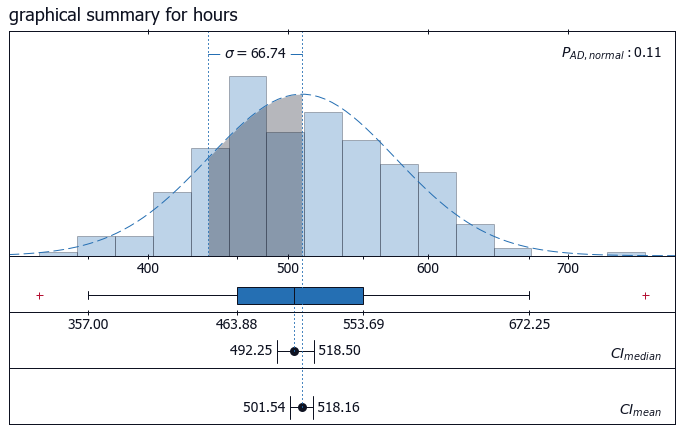

In [4]:
summary = series._.workdays()._.performance.summary()
print(summary)
summary.plot()

### control chart

Met een control chart zien we of er uitschieters in de series te vinden zijn. Deze uitschieters vragen altijd om uitzoekwerk; wat zorgt er voor dat er deze uitschieters hebben plaatsgevonden? En moet ik ze eventueel uit de dataset verwijderen?

mean:                           509.85
standard deviation:             66.74
upper control limit:            710.06
lower control limit:            309.64
outliers:                       1



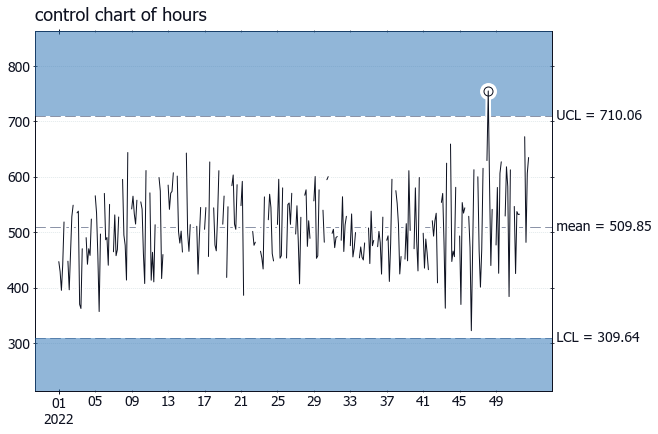

In [5]:
control_chart = series._.workdays()._.performance.control_chart()
print(control_chart)
control_chart.plot()

### run chart

Met een run chart onderzoeken we of zich in een series opeenvolgende waarnemingen bijzondere situaties voordoen. Bijvoorbeeld een lange op- of aflopende reeks, of een oscillerende beweging. Let op: $np.nan$ waarden tellen mee in een reeks dus vervormen het beeld.

runs about the median:          107
expected runs about the median: 126
longest run about the median:   8
clustering (p ≈ 0.01):          True
mixtures (p ≈ 0.99):            False

runs up or down:                164
expected runs up or down:       166
longest run up or down:         4
trends (p ≈ 0.36):              False
oscillation (p ≈ 0.64):         False


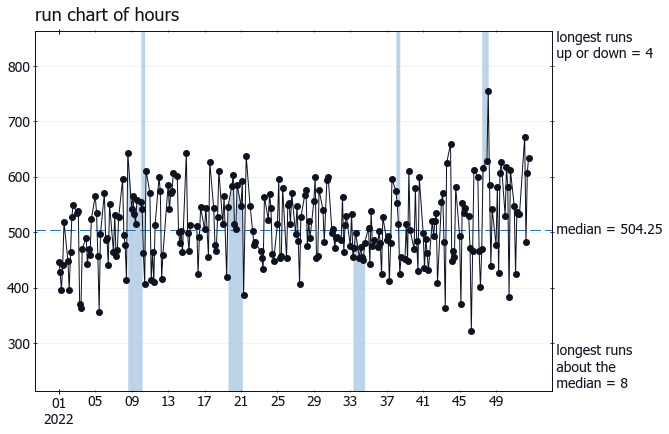

In [6]:
run_chart = series._.workdays().dropna()._.performance.run_chart()
print(run_chart)
run_chart.plot()

### process capability

Met de process capability beoordeel je hoe een proces op lange termijn presteert. Hiervoor voer je een aantal parameters in het de geleverde prestatie tegen af te zetten:
- LSL (lower specification limit); wat is de ondergrens van de prestatie
- of in plaats hiervan LB (lower bound); de laagste waarde die kan voorkomen (bijvoorbeeld 0 uren)
- USL (upper specification limit); wat is de bovengrens van de prestatie
- of in plaats hiervan UB (upper bound); de hoogste waarde die kan voorkomen
- target; het gewenste doel, de perfecte waarde


Process Data                       Potential Capability               Overall Capability                 
target         500                 Cp             0.50                Pp             0.50                
LSL            400.00              Cpl            0.55                Ppl            0.55                
USL            600.00              Cpu            0.45                Ppu            0.45                
mean           509.85              Cpk            0.45                Ppk            0.45                
n              250                 CCpk           0.50                Cpm            0.50                
std within     66.80               
std overall    66.74               

Observed Performance               Expected Performance (Within)      Expected Performance (Overall)     
PPM < LSL      40000               PPM < LSL      50051               PPM < LSL      49881               
PPM > USL      100000              PPM > USL      88598               PPM > USL

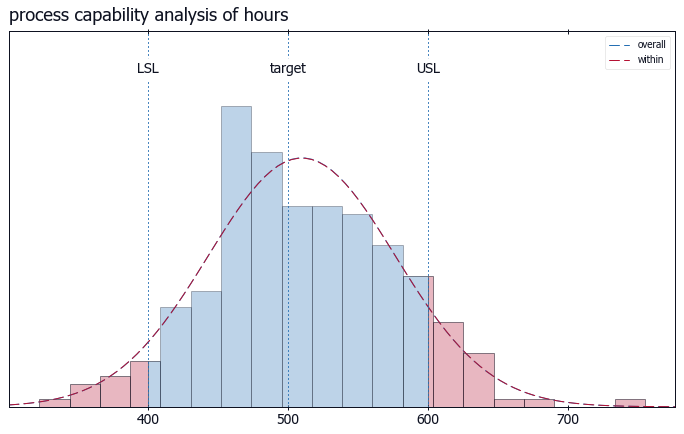

In [7]:
process_capability = series._.workdays().dropna()._.performance.process_capability(lsl=400, usl=600, target=500)
print(process_capability)
process_capability.plot()

In de tabel staat rechts-onder de verwachtte lange-termijn prestatie. Hoeveel procent van de observaties zal afwijken van de specificaties?